## Final Project Submission

* Student name: Mia Iseman & Sherry Yang
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

## Our goal: Predict the sale price of houses in King County, WA for HomeAway, an Airbnb and VRBO competitor who was recently acquired by Expedia located in Bellvue, WA. 

### Why does HomeAway want to predict the house prices in King County? 

* HomeAway wants to know how much employees will be paying for their homes if they create a King County Office as well as possibilities of taxes increasing.
* HomeAway is interested in purchasing homes in the area for special event rentals and executive suites. 
* Tangential beneficial knowledge: If there is a drop in consumer interest in purchasing homes then HomeAway will lose traffic to the site (beyond the scope of our project)
* HomeAway is interested in any knowledge we can gain from any features within the data set.


### We will predict the sale price of houses in KC using the following steps: 
* Obtain and understand our data 
* Scrub our data 
* Explore our data 
* Model our data - using multivariate linear regression 
* Test our model 
* Report findings 

## Obtain and Understand Our Data 

In [79]:
#import pandas to view and clean data using dataframes
import pandas as pd 
#import numpy to perform calculations on the data easily  
import numpy as np 
import matplotlib as plt
import math as math

#read the file as a dataframe
kc_df = pd.read_csv('kc_house_data.csv')

In [80]:
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### We will be using this key to identify what data is in our data set. These are the descriptions of the columns from our data set.  

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  TARGET
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [81]:
kc_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### We had a few assumptions and questions to ask HomeAway about their data. Findings are below:
* id is a unique identifier per house 
* bathroomsNumber is the number of bathrooms per house 
* waterfront has three values: NaN, 0, and 1. NaN values means it is unknown whether that property has a waterfornt view.
* views has values NaN and whole number values 0-4. We suspected this was the number of times that a property has been seen before it was sold, but it is actually the number of interesting views from the property.   
* condition has whole number values 1-5
* grade has values 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, and 13. Based on the King County glossary, this is the "classification by construction quality which refers to the types of materials used and the quality of workmanship."
* yr_renovated has some NaN values, which implies that property was not never renovated. 

## Scrubbing our data - edit this phrasing

From understanding the data, we have two main goals before moving on to modeling the data. 

1. We want to change our objects into floats or integers so we can work with that data. 

2. We want to eliminate the redundancy between zeros and null values for yr_renovated and view. 

In [82]:
#replace the basement "?" with null
kc_df['sqft_basement'] = pd.to_numeric(kc_df['sqft_basement'], errors='coerce')

In [83]:
#Change the date column objects to be datetime entries.
kc_df.date = pd.to_datetime(kc_df.date, format='%m/%d/%Y')

### To everything there is a season! - edit this phrasing
We change ... 

In [84]:
import datetime
def find_date(dates):
    output = []
    for date in dates: 
        day_of_year = (date - datetime.datetime(date.year, 1, 1)).days + 1
        output.append(day_of_year)
    return output

In [85]:
date_series = pd.Series(find_date(kc_df['date']))

In [86]:
kc_df = kc_df.drop(["date"], axis=1)

In [87]:
season_days = dict(
    winter=set(range(1,80)).union(set(range(352,367))),
    spring=set(range(80,171)),
    summer=set(range(171,264)),
    autumn=set(range(264,352)),
)

In [88]:
def find_season(days_from_jan1):
    """Return the season as a string"""
    for season, days in season_days.items():
        if days_from_jan1 in days:
            return season

In [89]:
date_series = date_series.apply(find_season)

In [90]:
kc_df = pd.concat([kc_df, date_series], axis =1)
kc_df.rename(columns={0:'season'}, 
                 inplace=True) 
kc_df.loc[kc_df["season"]=='spring','season'] = 1
kc_df.loc[kc_df["season"]=='summer','season'] = 2
kc_df.loc[kc_df["season"]=='autumn','season'] = 3
kc_df.loc[kc_df["season"]=='winter','season'] = 4
kc_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,season
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,4
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,4


We notice that waterfront is a categorical set of data - a 1 indicates that something is on the water, and a 0 means it is not. A null value means that it is unknown whether or not the property is on the water. We will change the waterfront type to a categorical variable and then use dummy variables to append two dummy variable columns to the end of the dataframe. 

In [91]:
water_series = pd.Series(kc_df.waterfront)
kc_df['waterfront'] = water_series.astype('category')
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null category
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
season           21597 non-null int64
dtypes: category(1), float64(8), int64(12)
memory usage: 3.3 MB


In [92]:
kc_df = pd.get_dummies(kc_df)
kc_df = kc_df.rename(columns={"waterfront_1.0": "waterfront"})
kc_df.head().T

,0,1,2,3,4
id,7.129301e+09,6.414100e+09,5.631500e+09,2.487201e+09,1.954401e+09
price,2.219000e+05,5.380000e+05,1.800000e+05,6.040000e+05,5.100000e+05
bedrooms,3.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00
bathrooms,1.000000e+00,2.250000e+00,1.000000e+00,3.000000e+00,2.000000e+00
sqft_living,1.180000e+03,2.570000e+03,7.700000e+02,1.960000e+03,1.680000e+03
sqft_lot,5.650000e+03,7.242000e+03,1.000000e+04,5.000000e+03,8.080000e+03
floors,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
view,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00
grade,7.000000e+00,7.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00


## Location, location, location

We combine latitude and longitude into one feature called coordinates.

In [93]:
coords = tuple(zip(kc_df.loc[:,'lat'], kc_df.loc[:,'long']))
coordinates = pd.Series(coords)
kc_df['coordinates'] = coordinates

What areas have expensive houses? If the property is near an "expensive area," we hypothesize that its location will affect the price of the home. To find "expensive areas," we look at the median home value (as opposed to mean, thus lessening outliers' effects) grouped by zipcodes:

<module 'matplotlib.tight_layout' from '/Users/tjjj/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py'>

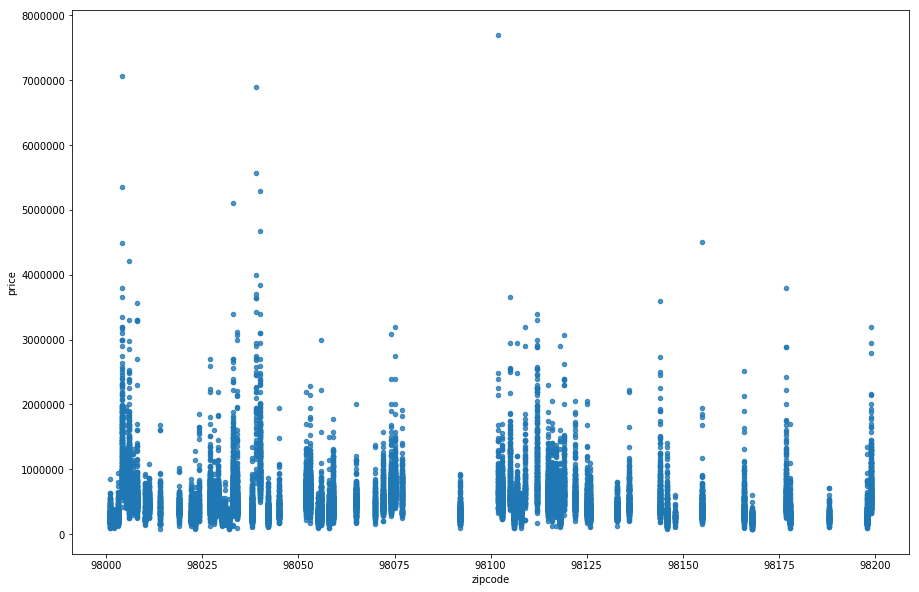

In [94]:
kc_df.plot(kind="scatter", x="zipcode", y="price", alpha=0.8, figsize=(15,10))
plt.tight_layout

In [95]:
price_zips_df = kc_df[['price','zipcode']]

In [96]:
median_zip_prices_df = price_zips_df.groupby(['zipcode']).median()

In [97]:
median_zip_prices_df.sort_values(by=['price']).tail(20)

,price
zipcode,
98027,570500.0
98122,572000.0
98029,575000.0
98052,615000.0
98053,635000.0
98074,642000.0
98077,652475.0
98105,675000.0
98033,678350.0


Pressed a bit for time and unfamiliar with the syntax we might use to make a function that did this, we opted to check these twenty zipcodes by hand to see where these "expensive areas" are. Are they all near Seattle? Nope! We found that all these "expensive areas" are near (less than ~5 miles from) the following coordinates:    

In [98]:
downtown_seattle = (47.3633, -122.19584)
downtown_bellevue = (47.617382, -122.188503)
pine_lake = (47.587821, -122.034408)
magnolia = (47.649777, -122.399839)
woodinville = (47.757905, -122.049466)
kirkland = (47.676908, -122.192552)
tiger_mtn = (47.498987, -121.959350)
issaquah = (47.558402, -122.007307)
redmond = (47.659389, -122.056730)

Now we'll create columns that contain the distance from these "expensive areas." Haversine is what we'll use since it's easy and our distances are not very big. Basically, it approximates the earth is a perfect sphere and that's okay for our purposes.

In [99]:
from haversine import haversine 

dt_seattle_mi = []
for row in kc_df.coordinates:
    a = haversine(row, downtown_seattle, unit='mi')
    dt_seattle_mi.append(a) 
kc_df['seattle_dist'] = dt_seattle_mi

dt_bellevue_mi = []
for row in kc_df.coordinates:
    a = haversine(row, downtown_bellevue, unit='mi')
    dt_bellevue_mi.append(a)
kc_df['bellevue_dist'] = dt_bellevue_mi

pine_lake_mi = []
for row in kc_df.coordinates:
    a = haversine(row, pine_lake, unit='mi')
    pine_lake_mi.append(a)
kc_df['pine_lake_dist'] = pine_lake_mi

magnolia_mi = []
for row in kc_df.coordinates:
    a = haversine(row, magnolia, unit='mi')
    magnolia_mi.append(a)
kc_df['magnolia_dist'] = magnolia_mi

woodinville_mi = []
for row in kc_df.coordinates:
    a = haversine(row, woodinville, unit='mi')
    woodinville_mi.append(a)
kc_df['woodinville_dist'] = woodinville_mi

kirkland_mi = []
for row in kc_df.coordinates:
    a = haversine(row, kirkland, unit='mi')
    kirkland_mi.append(a)
kc_df['kirkland_dist'] = kirkland_mi

tiger_mtn_mi = []
for row in kc_df.coordinates:
    a = haversine(row, tiger_mtn, unit='mi')
    tiger_mtn_mi.append(a)
kc_df['tiger_mtn_dist'] = tiger_mtn_mi

issaquah_mi = []
for row in kc_df.coordinates:
    a = haversine(row, issaquah, unit='mi')
    issaquah_mi.append(a)
kc_df['issaquah_dist'] = issaquah_mi

redmond_mi = []
for row in kc_df.coordinates:
    a = haversine(row, redmond, unit='mi')
    redmond_mi.append(a)
kc_df['redmond_dist'] = redmond_mi

Some of these areas are more "expensive" than other areas, and so we have a hunch that grouping them together may make sense. For instance, being close to downtown Seattle may have a more widespread effect than being close to  to Tiger State Park because of commerce and population sizes for those areas. So, we can judge the distance from each of these differently. For now, I'll try splitting the data into two sets based loosely on distance from "commerce centers" vs. "residential/recreation centers."

In [100]:
#create a column of distances (mi) from the "commerce centers"
comm_distances = kc_df[['seattle_dist', 'bellevue_dist', 'redmond_dist']].min(axis=1)
kc_df['comm_dist'] = comm_distances

In [101]:
#create a column that will catch if something is closer to an expensive area that is not a commerce center 
center_distances= kc_df[['seattle_dist', 'bellevue_dist', 'pine_lake_dist',
       'magnolia_dist', 'woodinville_dist', 'kirkland_dist', 'tiger_mtn_dist',
       'issaquah_dist', 'redmond_dist']].min(axis=1)
kc_df['center_dist'] = center_distances
kc_df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
view,0,0,0,0,0
condition,3,3,3,5,3
grade,7,7,6,7,8


Before we begin to explore the features, we'll drop id from our list of features, since we already have our information in a single dataframe and it will not help us to know the random id in order to predict the price. Also, waterfront_0.0 is redundant since it's just the inverse of waterfront_1.0 minus some null values. So, we'll drop that too, leaving 'waterfront' as our column with a 1 that indicates whether something is on the water or not. Later, we may change this to boolean values.

In [102]:
kc_df['sqft_per_room'] = kc_df['sqft_living']/(kc_df['bedrooms']+kc_df['bathrooms'])

Create a new feature that combines grade, view, waterfront, and condition 
Step 1: log the features that have data that are not normally distributed 

Step 2: scale all the features 

Step 3: add the scaled values together

In [103]:
# condition_log = np.log(kc_df['condition'])
# condition_log = pd.Series(condition_log)
# kc_df['condition_log'] = condition_log
# kc_df = kc_df.drop('condition', axis = 1)

In [104]:
#Step 2: scale all the features 
#import necessary library to use a standardscaler
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
kc_looks_std = kc_df[['grade', 'view', 'waterfront', 'condition']]
kc_looks_std = pd.DataFrame(ss.fit_transform(kc_looks_std),
                          columns = ['grade_std', 'view_std', 'waterfront_std', 
                                      'condition_std'])
    
kc_looks_std.head()

/Users/tjjj/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tjjj/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,grade_std,view_std,waterfront_std,condition_std
0,-0.560800,-0.305436,-0.0825,-0.629986
1,-0.560800,-0.305436,-0.0825,-0.629986
2,-1.413190,-0.305436,-0.0825,-0.629986
3,-0.560800,-0.305436,-0.0825,2.444427
4,0.291589,-0.305436,-0.0825,-0.629986


In [105]:
kc_df['appeal_std']= kc_looks_std.apply(lambda x: x['grade_std'] + 
                                          x['view_std'] + 2*x['waterfront_std'] + 
                                          x['condition_std'],axis= 1)
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 36 columns):
id                  21597 non-null int64
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
view                21534 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21143 non-null float64
yr_built            21597 non-null int64
yr_renovated        17755 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
season              21597 non-null int64
waterfront_0.0      21597 non-null uint8
waterfront    

In [106]:
kc_df = kc_df.loc[~kc_df['appeal_std'].isna(), :]
#drop the rows where appeal is null

In [107]:
kc_df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'season', 'waterfront_0.0', 'waterfront', 'coordinates',
       'seattle_dist', 'bellevue_dist', 'pine_lake_dist', 'magnolia_dist',
       'woodinville_dist', 'kirkland_dist', 'tiger_mtn_dist', 'issaquah_dist',
       'redmond_dist', 'comm_dist', 'center_dist', 'sqft_per_room',
       'appeal_std'],
      dtype='object')

In [109]:
#drop columns we aren't going to use anymore
kc_df = kc_df.drop(['id', 'lat', 'long', 'waterfront_0.0', 'sqft_living', 'coordinates',
                    'sqft_basement', 'zipcode', 'yr_renovated'], axis=1) 

In [110]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 27 columns):
price               21534 non-null float64
bedrooms            21534 non-null int64
bathrooms           21534 non-null float64
sqft_lot            21534 non-null int64
floors              21534 non-null float64
view                21534 non-null float64
condition           21534 non-null int64
grade               21534 non-null int64
sqft_above          21534 non-null int64
yr_built            21534 non-null int64
sqft_living15       21534 non-null int64
sqft_lot15          21534 non-null int64
season              21534 non-null int64
waterfront          21534 non-null uint8
seattle_dist        21534 non-null float64
bellevue_dist       21534 non-null float64
pine_lake_dist      21534 non-null float64
magnolia_dist       21534 non-null float64
woodinville_dist    21534 non-null float64
kirkland_dist       21534 non-null float64
tiger_mtn_dist      21534 non-null float64
issaquah

In [111]:
#first we want to normalize our price data by logging it 
price_log = np.log(kc_df['price'])
price_log = pd.Series(price_log)
kc_df['price_log'] = price_log
kc_df = kc_df.drop('price', axis = 1)

In [119]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

y3 = kc_df[["price_log"]]
X3 = kc_df.drop(["price_log"], axis=1)

X3_new = SelectKBest(score_func=f_classif,k=6).fit_transform(X3, y3)
print(X3_new[:2].T)

/Users/tjjj/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[   7.            7.        ]
 [1180.         2170.        ]
 [1340.         1690.        ]
 [  11.83659484    6.6223751 ]
 [  13.85433542   12.9194943 ]
 [ 295.          489.52380952]]


In [120]:
print(X3.head(2).T)

                            0            1
bedrooms             3.000000     3.000000
bathrooms            1.000000     2.250000
sqft_lot          5650.000000  7242.000000
floors               1.000000     2.000000
view                 0.000000     0.000000
condition            3.000000     3.000000
grade                7.000000     7.000000
sqft_above        1180.000000  2170.000000
yr_built          1955.000000  1951.000000
sqft_living15     1340.000000  1690.000000
sqft_lot15        5650.000000  7639.000000
season               3.000000     3.000000
waterfront           0.000000     0.000000
seattle_dist        10.611129    25.373495
bellevue_dist        8.001373     9.387358
pine_lake_dist      11.652547    16.127943
magnolia_dist       11.661730     6.193156
woodinville_dist    19.593891    12.780978
kirkland_dist       11.836595     6.622375
tiger_mtn_dist      13.918203    22.714754
issaquah_dist       12.095620    18.351367
redmond_dist        13.854335    12.919494
comm_dist  

In [118]:
kc_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
       'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'season', 'waterfront', 'seattle_dist', 'bellevue_dist',
       'pine_lake_dist', 'magnolia_dist', 'woodinville_dist', 'kirkland_dist',
       'tiger_mtn_dist', 'issaquah_dist', 'redmond_dist', 'comm_dist',
       'center_dist', 'sqft_per_room', 'appeal_std', 'price_log'],
      dtype='object')

In [123]:
third_mv_model_data = kc_df.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'condition',
                                  'yr_built', 'sqft_lot15', 'season', 'waterfront', 'seattle_dist', 
                                  'bellevue_dist', 
                                  'pine_lake_dist',  'woodinville_dist', 'kirkland_dist',
                                  'tiger_mtn_dist', 'issaquah_dist', 'comm_dist',
                                  'center_dist', 'appeal_std'], axis=1) 
#don't drop: grade, swft_above, sqft_living15, magnolia, redmond, sqft_per_room

In [125]:
y3 = third_mv_model_data[["price_log"]]
X3 = third_mv_model_data.drop(["price_log"], axis=1)

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg3 = LinearRegression()
linreg3.fit(X3_train, y3_train)

y3_hat_train = linreg3.predict(X3_train)
y3_hat_test = linreg3.predict(X3_test)#check the r squared 
linreg_first.score(X,y)

In [126]:
#check the r squared 
linreg3.score(X3,y3)

0.7406817291682872

In [130]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cv_5_results = np.mean(cross_val_score(linreg3, X3, y3, cv=5, scoring="neg_median_absolute_error"))
cv_10_results = np.mean(cross_val_score(linreg3, X3, y3, cv=10, scoring="neg_median_absolute_error"))
cv_20_results = np.mean(cross_val_score(linreg3, X3, y3, cv=20, scoring="neg_median_absolute_error"))
print(abs(cv_5_results), abs(cv_10_results), abs(cv_20_results))

0.16578547743151742 0.16565098619389884 0.16554124893994962


In [133]:
#create a function for backtransforming price
def exp_absolute_error(y_actual, y_hat):
    return abs(np.exp(y_actual.values)-np.exp(y_hat))/(np.exp(y_actual.values))

In [134]:
#take the median 
np.median(exp_absolute_error(y3_test, y3_hat_test))

0.16234216073423144

Now that we've cleaned up our data, and generated new features we'll look at how the feature values are distributed.

## Exploring Our Data 

In [ ]:
#import necessary visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Find the statistical description of the features.
kc_df.describe().head()

In [ ]:
#make histograms of the features to visualize their distributions.
kc_df.hist(figsize=(15,12));
plt.tight_layout()

In [ ]:
#check to see where features have very high Pearson correlation coefficients 
kc_df.corr()>.95

In [ ]:
#make a heatmap to double check for multicollinearity 
sns.heatmap(kc_df.corr(), center=0);

From the heatmap and other graphs, we can see that no features are collinear, so we don't need to remove any from our dataset. 

### Normalizing and scaling our data - edit phrasing and placement - make sure to put before all our scaled/normalized features or comment about them already being normalized

In [ ]:
#first we want to normalize our price data by logging it 
price_log = np.log(kc_df['price'])
price_log = pd.Series(price_log)
kc_df['price_log'] = price_log
kc_df = kc_df.drop('price', axis = 1)

## Modeling our data 

In [ ]:
import statsmodels.api as sm
import statsmodels
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
plt.style.use('seaborn')

We are making our first model using one feature and seeing how it relates to price

In [ ]:
f = 'price_log~sqft_living15'
model = ols(formula=f, data=kc_df).fit()
model.summary()

In [ ]:
#This is what our first model looks like 
sns.regplot(x='sqft_living15', y='price_log', data=kc_df, line_kws={"color":"r"});

## Making a multivariate model

For our first multivariate model, I'll make a new dataframe with only variables we suspect will be good predictors of the property price.

In [ ]:
kc_df.columns

In [ ]:
#consider using columns you want to keep instead of dropping - miles 
first_mv_model_data = kc_df.drop(['yr_renovated', 'coordinates'], axis=1) 

In [ ]:
y = first_mv_model_data[["price_log"]]
X = first_mv_model_data.drop(["price_log"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg_first = LinearRegression()
linreg_first.fit(X_train, y_train)

y_hat_train = linreg_first.predict(X_train)
y_hat_test = linreg_first.predict(X_test)

In [338]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg_first = LinearRegression()
linreg_first.fit(X_train, y_train)

y_hat_train = linreg_first.predict(X_train)
y_hat_test = linreg_first.predict(X_test)

In [ ]:
#check the r squared 
linreg_first.score(X,y)

In [ ]:
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
cv_5_results = np.mean(cross_val_score(linreg_first, X, y, cv=5, scoring="neg_median_absolute_error"))
cv_10_results = np.mean(cross_val_score(linreg_first, X, y, cv=10, scoring="neg_median_absolute_error"))
cv_20_results = np.mean(cross_val_score(linreg_first, X, y, cv=20, scoring="neg_median_absolute_error"))

In [ ]:
#our median aboslute errors for these 5, 10, and 20-folds 
print(abs(cv_5_results), abs(cv_10_results), abs(cv_20_results))

In [ ]:
#create a function for backtransforming price
def exp_absolute_error(y_actual, y_hat):
    return abs(np.exp(y_actual.values)-np.exp(y_hat))/(np.exp(y_actual.values))

In [ ]:
#take the median 
np.median(exp_absolute_error(y_test, y_hat_test))
#wait, did this actually do anything? since we are taking a percentage anyway? 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif


# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features we want to select [here it's 5]
X_new = SelectKBest(score_func=f_classif,k=6).fit_transform(X, y)
print(X_new[:2])


print(X.head(2))

The top 6 predictors for log_price are floors, sqft_above, sqft_living15, center_distance, sqft_per_room, and appeal_std. 

In [ ]:
second_mv_model_data = kc_df.drop(['yr_renovated', 'coordinates', 'sqft_lot', 'sqft_lot15', 'season', 
                                   'coordinates', 'comm_dist'], axis=1)

In [ ]:
y2 = second_mv_model_data[["price_log"]]
X2 = second_mv_model_data.drop(["price_log"], axis=1)

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg2 = LinearRegression()
linreg2.fit(X2_train, y2_train)

y2_hat_train = linreg2.predict(X2_train)
y2_hat_test = linreg2.predict(X2_test)

In [ ]:
#check the r squared 
linreg2.score(X2,y2)

In [ ]:
cv_5_results = np.median(cross_val_score(linreg2, X2, y2, cv=5, scoring="neg_median_absolute_error"))
cv_10_results = np.median(cross_val_score(linreg2, X2, y2, cv=10, scoring="neg_median_absolute_error"))
cv_20_results = np.median(cross_val_score(linreg2, X2, y2, cv=20, scoring="neg_median_absolute_error"))

In [ ]:
np.median(exp_absolute_error(y2_test, y2_hat_test))

In [ ]:
#Down to 19%! Ha!